# OpenCV Basics
C++, python 등의 프로그래밍 언어로 컴퓨터 비전 분야의 처리를 위한 표준적인 패키지는 OpenCV이다.  
자세한 내용은 다음 [링크](https://opencv.org/)에서 알아보자.

Python package의 설치는 conda, pip 등을 이용할 수 있다.  
`pip3 install opencv-python`

이제, Python interactive shell을 시작해보자.  
`python3`

In [1]:
try:
    import cv2 as cv # load opencv
    import requests, shutil, matplotlib.pyplot as plt, numpy as np
except ImportError as e:
    print(f"You need to install the package(s) named below\n{str(e).split(' ')[-1]}")

In [2]:
# 예시 이미지 하나를 다운받겠다.
url = "https://image-cdn.hypb.st/https%3A%2F%2Fkr.hypebeast.com%2Ffiles%2F2021%2F06%2Fbritish-man-breaks-mm-stacking-guinness-world-record-info-01.jpg?cbr=1&q=90"
response = requests.get(url, stream=True)
with open('img.jpg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response
out_file.close()

opnecv를 통해 이미지 파일을 불러와서, matplotlib으로 사진을 확인해보자.

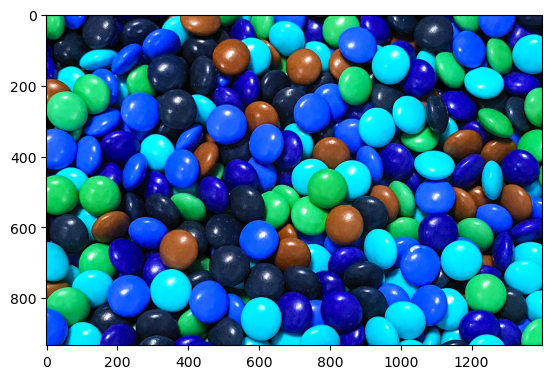

In [3]:
src = cv.imread('img.jpg')
plt.imshow(src)

위 그림에서 색상이 이상한 것을 알 수 있다. 이는 cv에서는 RGB(Red-Green-Blue)순서가 아닌 BGR순서를 사용하기 때문이다.  
다음 코드를 사용하여 원본 이미지와 같은 RGB 순서의 이미지로 변환해보자.

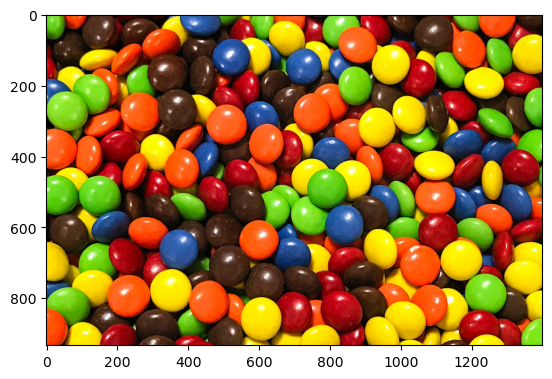

In [4]:
img = cv.cvtColor(src, cv.COLOR_BGR2RGBA)
plt.imshow(img)

이미지의 기본 단위는 픽셀(pixel; 화소)이다.  
화소는 데카르트 좌표계 상의 x, y 값과 (BGRA) 값을 갖는다. 여기서, A는 alpha값, 즉 투명도를 나타낸다.  
따라서, img.shape의 결과는 w, h, 그리고 채널수 4 (BGRA)이고, img[0,0], 즉 이미지의 좌측 최상단 픽셀을 확인하면, BGRA 값의 배열임을 알 수 있다.  
또한, plt.imshow()의 결과에 보이듯, x-, y축에는 w와 h가 표현된다.

h는 높이인 933를, w는 너비인 1400를, c는 색상 채널 수인 4를 리턴한다.
(933, 1400, 4)
[101 221  38 255]


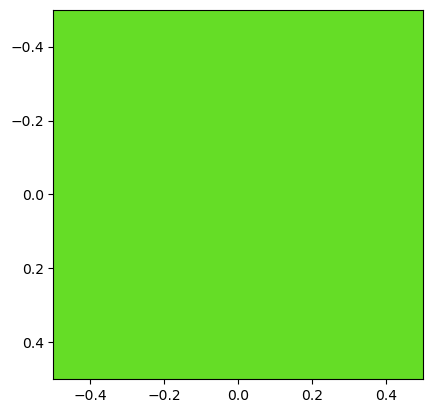

In [5]:
h, w, c = img.shape
print(f"h는 높이인 {h}를, w는 너비인 {w}를, c는 색상 채널 수인 {c}를 리턴한다.")
print(img.shape) # (933, 1400, 4)
print(img[0,0]) # [101, 220, 40, 255]
plt.imshow(img[0:1,0:1])

이미지 객체는 splicing을 통해 부분만 취할 수 있다.  
이미지의 한 중간을 따오고자 하면 다음과 같다.  
이 때, 아래의 슬라이싱에서도 볼 수 있듯, \[y축:x축\]으로 구성되어 있음을 유의하자.  
또한, 슬라이싱은 0을 기준으로 함을 유의하자.

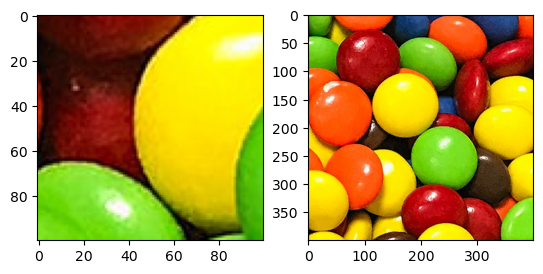

In [6]:
h, w, _ = img.shape
partial_img = img[int(h/2)-50:int(h/2)+50, int(w/2)-50:int(w/2)+50] # 높이 933, 너비 1400인 이미지 한 중간을 기준으로 높이 100, 너비 100만큼 이미지를 잘랐다.
plt.subplot(1,2,1)
plt.imshow(partial_img)

# 우측 하단 400*400 이미지 추출은 다음과 같다.
img2 = img[h-400:h, w-400:w]
plt.subplot(1,2,2)
plt.imshow(img2)

이제, contour (윤곽선) 찾기를 시작해보자.  
자세한 설명은 이 [링크](https://dsbook.tistory.com/226)를 참조하자.  
예시물로는 위에서 정의한 img2 객체를 이용하겠다.

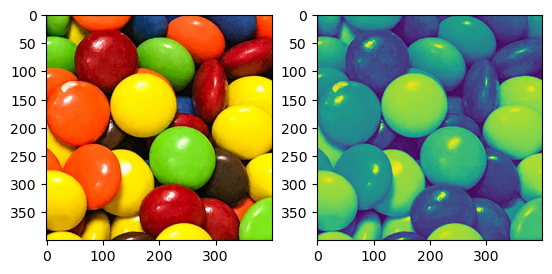

In [7]:
# Grey scale화를 통한 one-factor 기반 contour detection
plt.subplot(1,2,1)
example_img = img2.copy()
plt.imshow(example_img)
plt.subplot(1,2,2)
example_grey = cv.cvtColor(example_img, cv.COLOR_RGB2GRAY) # img2는 RGBA로 구성되어 있기 때문에 COLOR_RGB2GRAY colour space를 사용했다. 만약 바로 이미지를 불러와 작업한다면, COLOR_BGR2GRAY를 사용해야 한다.
plt.imshow(example_grey)

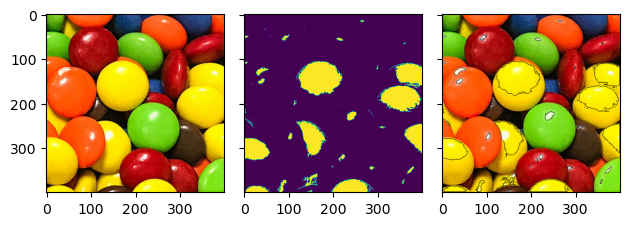

In [8]:
example_img2 = img2.copy() # 원본 이미지 initiation

plt.subplots(1,3, sharey=True)

plt.subplot(1,3,1)
plt.imshow(example_img2)
example_grey = cv.cvtColor(example_img2, cv.COLOR_RGB2GRAY)

# contour dectection을 위한 threshold 필터를 설정해준다. 원하는 부분과 원치 않는 부분을 구분하는 과정이라 생각하면 이해하기 쉽다.
thresh = 210 # 0~255 사이의 관문값
res, thr = cv.threshold(example_grey, thresh, 255, cv.THRESH_BINARY) # 마지막 변수 2은, 관문값 이하에 대한 처리 방식을 설정한다. 자세한 내용은 아래 링크를 참조하자.
# https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html
plt.subplot(1,3,2)
plt.imshow(thr)

# contour detection

plt.subplot(1,3,3)
contour, _ = cv.findContours(thr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
# cv.drawContours(example_img2, contour, -1, (255,255,0), -1) # -1 for the third variable to draw all contours in contour object, -1 for last variable means linewidth and fill inside the contour if -1.

# cv.drawContours가 에러가 발생하여 아래와 같은 대체법으로 contour를 검은색으로 직접 그렸음
for i in contour:
    for j in i:
        for k in j:
            example_img2[k[1],k[0]] = [ 0, 0, 0, 255 ]

plt.imshow(example_img2)

plt.tight_layout()
plt.show()

이제, 실증적인 이미지를 통해 filter 기법에 대해 알아보자.

In [9]:
url2 = "https://www.chromagar.com/wp-content/uploads/2021/11/CCA-1.png"

response2 = requests.get(url2, stream=True)
with open('img2.png', 'wb') as out_file2:
    shutil.copyfileobj(response2.raw, out_file2)
del response2
out_file2.close()

bw_img = cv.imread('img2.png')

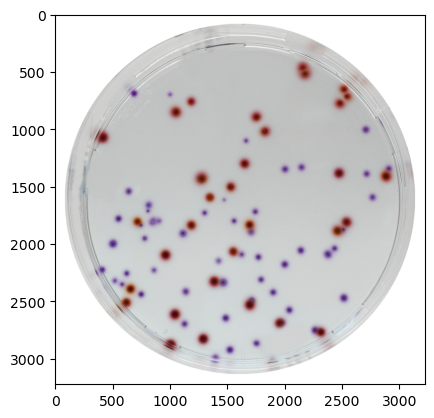

In [10]:
plt.imshow(bw_img)

우선, RGB 색상의 이미지를 HSV colour space로 변경해보자.

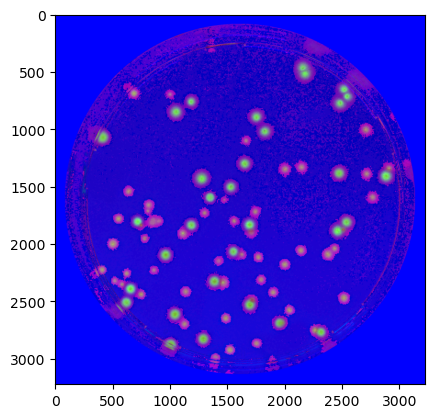

In [11]:
hsv_bw = cv.cvtColor(bw_img, cv.COLOR_BGR2HSV)
plt.imshow(hsv_bw)

HSV에 대한 자세한 설명은 다음 [링크](https://ko.wikipedia.org/wiki/HSL%EA%B3%BC_HSV)를 참조하자.  
육안으로 보는 색상(RGB)과 달리, HSV로 변환한 경우 컴퓨터가 인식하는 색상 간에는 큰 차이가 있음을 알 수 있다.  
예를 들어, 우리가 구분하는 붉은색 콜로니 주변부를 컴퓨터는 정확하게 중심과 주변부를 구분하고 있음을 알 수 있다.  
이를 이용하여, 붉은색 콜로니와 보라색 콜로니를 구분하여 콜로니의 갯수를 세는 간단한 코드를 작성해보자.

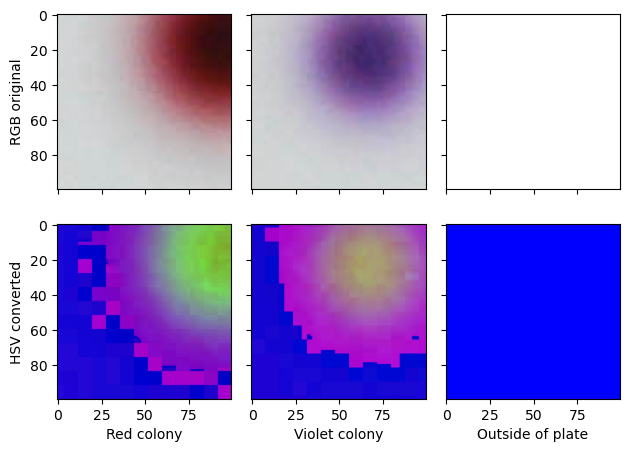

In [12]:
# 이미지 상의 색상값을 먼저 추출해보자.

plt.subplots(2,3, sharex=True, sharey=True)

plt.subplot(2,3,1)
plt.ylabel("RGB original")
plt.imshow(bw_img[2600:2700, 950:1050]) # red colony

plt.subplot(2,3,2)
plt.imshow(bw_img[2450:2550, 2450:2550]) # violet colony

plt.subplot(2,3,3)
plt.imshow(bw_img[0:100,0:100]) # out of plate; white

plt.subplot(2,3,4)
plt.ylabel("HSV converted")
plt.xlabel("Red colony")
plt.imshow(cv.cvtColor(bw_img[2600:2700, 950:1050], cv.COLOR_BGR2HSV)) # red colony

plt.subplot(2,3,5)
plt.xlabel("Violet colony")
plt.imshow(cv.cvtColor(bw_img[2450:2550, 2450:2550], cv.COLOR_BGR2HSV)) # violet colony

plt.subplot(2,3,6)
plt.xlabel("Outside of plate")
plt.imshow(cv.cvtColor(bw_img[0:100,0:100], cv.COLOR_BGR2HSV)) # out of plate; white

plt.tight_layout()
plt.show()

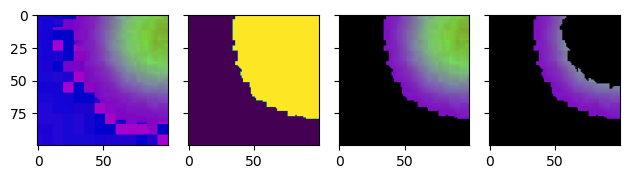

In [13]:
frame = cv.cvtColor(bw_img[2600:2700, 950:1050], cv.COLOR_BGR2HSV)
lower = np.array([0,15,0])
upper = np.array([255,255,255]) # HSV color pallete에서 육안으로 확인해보길 바람; 무채색은 Hue와 brightness에 관계 없이, Saturation(채도)로만 결정됨을 알면 쉽게 이해할 수 있음
mask1 = cv.inRange( frame, lower, upper ) # 노란색이 마스킹되지 않은 부분 - 살려둘 부분이다.
mask2 = cv.inRange( frame, np.array([0,15,160]), np.array([255,255,255]) ) # 콜로니 중심을 제외한 나머지 halo 부분을 걸러낼 수 있다.

plt.subplots(1,4,sharey=True)

plt.subplot(1,4,1)
plt.imshow(frame)

plt.subplot(1,4,2)
plt.imshow(mask1)

plt.subplot(1,4,3)
res = cv.bitwise_and(frame, frame, mask = mask1)
plt.imshow(res)

plt.subplot(1,4,4)
res = cv.bitwise_and(frame, frame, mask = mask2)
plt.imshow(res)

plt.tight_layout()
plt.show()

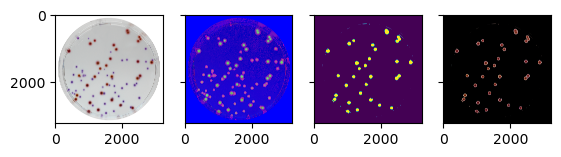

In [14]:
# 위를 응용하여, 붉은색 계열만 잡아보도록 하자.
red_test = hsv_bw.copy()
red_upper = np.array([150,255,255])
red_lower = np.array([20,40,0])
red_mask = cv.inRange( red_test, red_lower, red_upper )
red_masked = cv.cvtColor(cv.bitwise_and(red_test, red_test, mask = red_mask), cv.COLOR_HSV2BGR)

plt.subplots(1,4,sharey=True)

plt.subplot(1,4,1)
plt.imshow(bw_img)

plt.subplot(1,4,2)
plt.imshow(red_test)

plt.subplot(1,4,3)
plt.imshow(red_mask)

plt.subplot(1,4,4)
plt.imshow(red_masked)

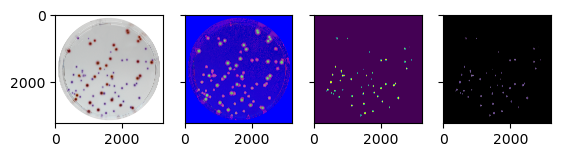

In [15]:
# 마찬가지로, 보라색 계열만 잡아보도록 하자.
blue_test = hsv_bw.copy()
blue_upper = np.array([255,255,255])
blue_lower = np.array([160,70,0])
blue_mask = cv.inRange( blue_test, blue_lower, blue_upper )
blue_masked = cv.cvtColor(cv.bitwise_and(blue_test, blue_test, mask = blue_mask), cv.COLOR_HSV2BGR)

plt.subplots(1,4,sharey=True)

plt.subplot(1,4,1)
plt.imshow(bw_img)

plt.subplot(1,4,2)
plt.imshow(blue_test)

plt.subplot(1,4,3)
plt.imshow(blue_mask)

plt.subplot(1,4,4)
plt.imshow(blue_masked)

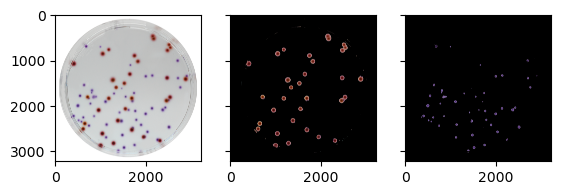

In [17]:
# 결과값들을 모아서 보면 다음과 같다.

plt.subplots(1,3,sharey=True)

plt.subplot(1,3,1)
plt.imshow(bw_img)
plt.subplot(1,3,2)
plt.imshow(red_masked)
plt.subplot(1,3,3)
plt.imshow(blue_masked)

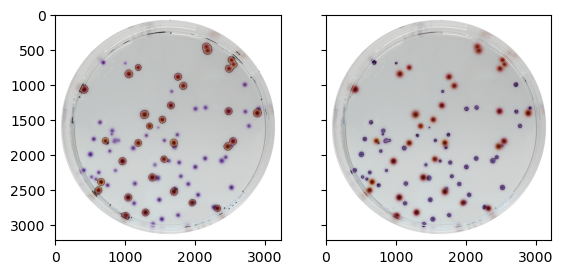

In [ ]:
red_test = hsv_bw.copy()
red_orig = cv.cvtColor(red_test, cv.COLOR_HSV2BGR)
red_upper = np.array([150,255,255])
red_lower = np.array([20,40,0])
red_mask = cv.inRange( red_test, red_lower, red_upper )
red_masked = cv.cvtColor(cv.bitwise_and(red_test, red_test, mask = red_mask), cv.COLOR_HSV2BGR)

red_res, red_thr = cv.threshold(red_mask, thresh, 255, cv.THRESH_BINARY)
red_cnt, _ = cv.findContours(red_thr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


blue_test = hsv_bw.copy()
blue_orig = cv.cvtColor(blue_test, cv.COLOR_HSV2BGR)
blue_upper = np.array([255,255,255])
blue_lower = np.array([160,70,0])
blue_mask = cv.inRange( blue_test, blue_lower, blue_upper )
blue_masked = cv.cvtColor(cv.bitwise_and(blue_test, blue_test, mask = blue_mask), cv.COLOR_HSV2BGR)

blue_res, blue_thr = cv.threshold(blue_mask, thresh, 255, cv.THRESH_BINARY)
blue_cnt, _ = cv.findContours(blue_thr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

plt.subplots(1,2,sharey=True)

plt.subplot(1,2,1)
cv.drawContours(red_orig, red_cnt, -1, (0,0,0), 4)
plt.imshow(red_orig)

plt.subplot(1,2,2)
cv.drawContours(blue_orig, blue_cnt, -1, (0,0,0), 4)
plt.imshow(blue_orig)

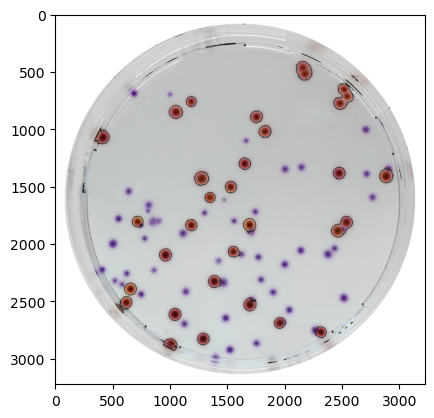

In [ ]:
plt.imshow(red_orig)

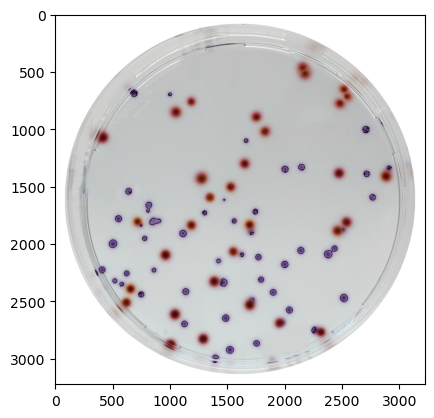

In [ ]:
plt.imshow(blue_orig)